<a href="https://colab.research.google.com/github/Seungeun-dune/Practice/blob/main/dicom_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DICOM DEMO

# 1) pydicom

In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.3 MB/s 


In [ ]:
import pydicom
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#!unzip -qq "/content/drive/MyDrive/dicom_viewer_0002.zip" -d "/content/drive/MyDrive/dicom-demo"

In [ ]:
img_dir = "/content/drive/MyDrive/dicom-demo"

In [ ]:
import os
os.listdir(img_dir)

['0002.DCM']

In [ ]:
len(os.listdir(img_dir))

1

In [ ]:
filelist = os.listdir(img_dir)

In [ ]:
filename = img_dir + "/" + filelist[0]

In [ ]:
dcm = pydicom.dcmread(filename)
sex = dcm.PatientSex
img = dcm.pixel_array[0]

In [ ]:
sex

'M'

(-0.5, 511.5, 511.5, -0.5)

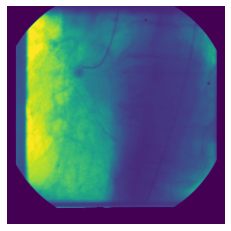

In [ ]:
plt.imshow(img)
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

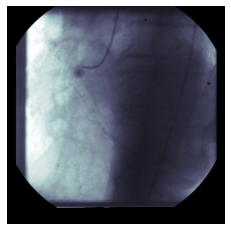

In [ ]:
plt.imshow(img, cmap = plt.cm.bone)
plt.axis("off")

# 2) SimpleITK

In [ ]:
!pip install simpleITK

In [ ]:
import SimpleITK as sitk

In [ ]:
img_itk = sitk.ReadImage(filename)

In [ ]:
img_itk.GetWidth()

512

In [ ]:
img_itk.GetHeight()

512

In [ ]:
img_itk.GetDepth()

96

In [ ]:
img_itk.GetDimension()

3

In [ ]:
img_itk.GetPixelIDValue()

1

In [ ]:
img_itk.GetPixelIDTypeAsString()

'8-bit unsigned integer'

In [ ]:
img_itk_arr = sitk.GetArrayFromImage(img_itk)

(-0.5, 511.5, 511.5, -0.5)

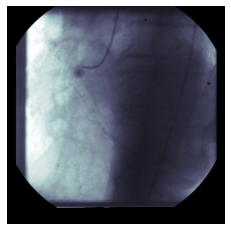

In [ ]:
plt.imshow(img_itk_arr[0], cmap =plt.cm.bone)
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

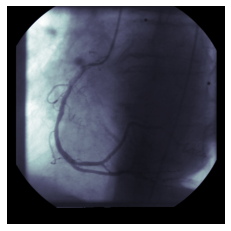

In [ ]:
plt.imshow(img_itk_arr[95], cmap =plt.cm.bone)
plt.axis("off")

In [ ]:
len(img_itk_arr)

96

# Normalization

In [ ]:
import numpy as np

In [ ]:
images = sitk.ReadImage(filename)

In [ ]:
images_array = sitk.GetArrayFromImage(images).astype("float")

In [ ]:
img = np.squeeze(images_array)
copy_img = img.copy()

In [ ]:
min = np.min(copy_img)
max = np.max(copy_img)

In [ ]:
copy_img1 = copy_img - np.min(copy_img)

In [ ]:
copy_img2 = copy_img1 / np.max(copy_img1)

In [ ]:
copy_img2 = copy_img2 * 255

In [ ]:
copy_img2 = copy_img2.astype(np.uint8)

In [ ]:
copy_img2

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

(-0.5, 511.5, 511.5, -0.5)

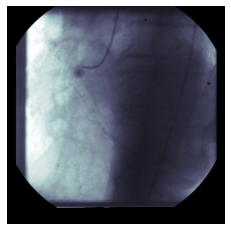

In [ ]:
plt.imshow(copy_img2[0], cmap = plt.cm.bone)
plt.axis("off")